# Anti-Spoofing Dataset Demo

This notebook demonstrates how to use the `AntiSpoofDataset` class defined in `dataset.py`.
It shows how to load the merged dataset (LCC_FASD + SiW) and visualizes the effect of augmentations on the training set.

In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from dataset import AntiSpoofDataset, get_transforms
import albumentations as A

# Define dataset roots
lcc_fasd_root = 'data/LCC_FASD'
siw_root = 'data/SiW'

# Function to denormalize image for visualization
def denormalize(tensor):
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    
    img = tensor.permute(1, 2, 0).numpy()
    img = std * img + mean
    img = np.clip(img, 0, 1)
    return img

## 1. Validation Dataset (No Augmentation)
First, we load the validation set. This uses only Resize and Normalize transforms, so the images should look standard.

In [5]:
# Load Validation Dataset
val_dataset = AntiSpoofDataset(
    lcc_fasd_root=lcc_fasd_root,
    siw_root=siw_root,
    split='val',
    transform=get_transforms(split='val')
)

print(f"Validation samples: {len(val_dataset)}")

Validation samples: 3698


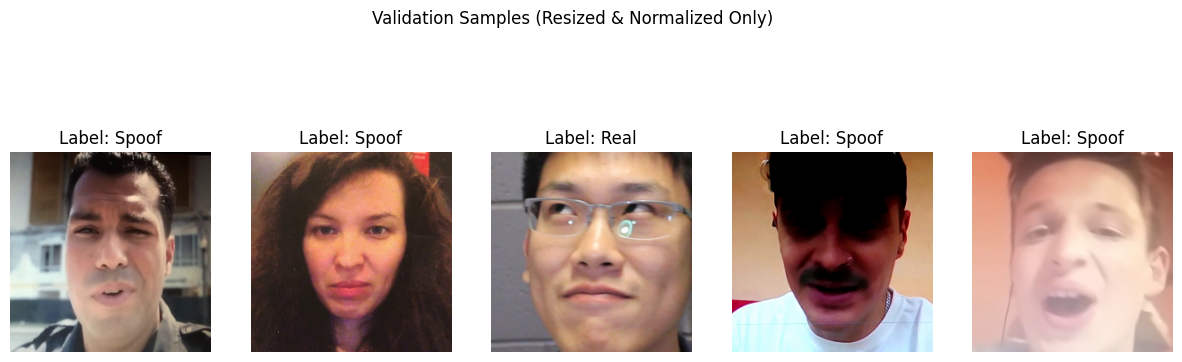

In [6]:
# Visualize a few validation samples
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
indices = np.random.choice(len(val_dataset), 5, replace=False)

for i, idx in enumerate(indices):
    image, label = val_dataset[idx]
    axes[i].imshow(denormalize(image))
    axes[i].set_title(f"Label: {'Spoof' if label == 1 else 'Real'}")
    axes[i].axis('off')

plt.suptitle("Validation Samples (Resized & Normalized Only)")
plt.show()

## 2. Training DatasetWith Augmentation
Now we load the training set. This pipeline includes HorizontalFlip, RandomBrightnessContrast, and ShiftScaleRotate.

In [7]:
# Load Training Dataset
train_dataset = AntiSpoofDataset(
    lcc_fasd_root=lcc_fasd_root,
    siw_root=siw_root,
    split='train',
    transform=get_transforms(split='train')
)

print(f"Training samples: {len(train_dataset)}")

Training samples: 14385


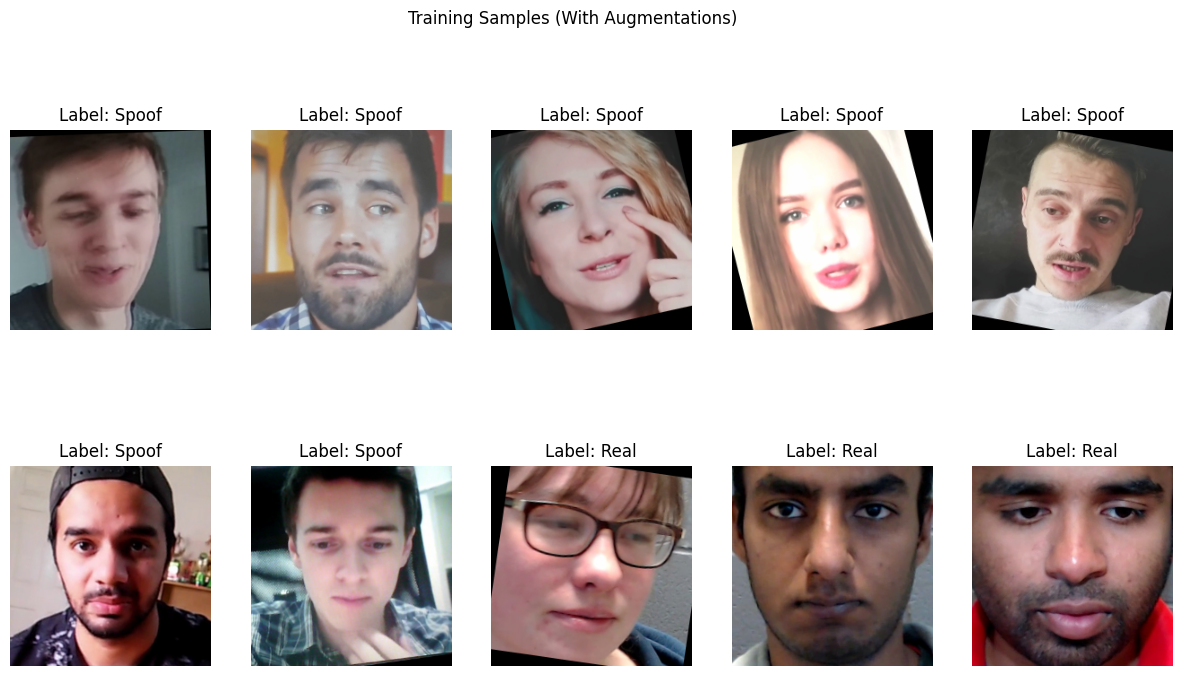

In [8]:
# Visualize training samples to see augmentations
fig, axes = plt.subplots(2, 5, figsize=(15, 8))
indices = np.random.choice(len(train_dataset), 10, replace=False)

for i, idx in enumerate(indices):
    image, label = train_dataset[idx]
    row = i // 5
    col = i % 5
    axes[row, col].imshow(denormalize(image))
    axes[row, col].set_title(f"Label: {'Spoof' if label == 1 else 'Real'}")
    axes[row, col].axis('off')

plt.suptitle("Training Samples (With Augmentations)")
plt.show()

## 3. Class Distribution Analysis
Let's check the ratio of Real vs. Spoof faces in the merged Train, Validation and Test sets.

Train Set - Total: 14385
  Real: 6099 (42.4%)
  Spoof: 8286 (57.6%)
  Ratio Spoof:Real = 1.36:1


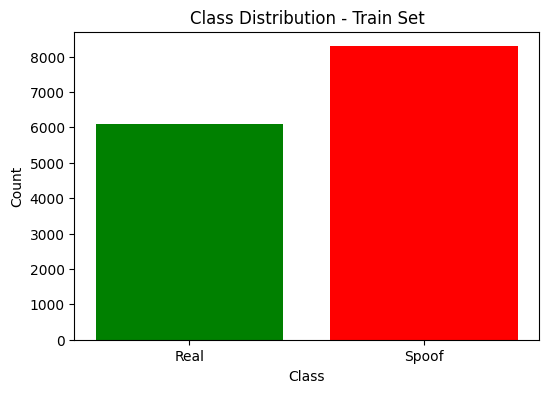

Val Set - Total: 3698
  Real: 1005 (27.2%)
  Spoof: 2693 (72.8%)
  Ratio Spoof:Real = 2.68:1


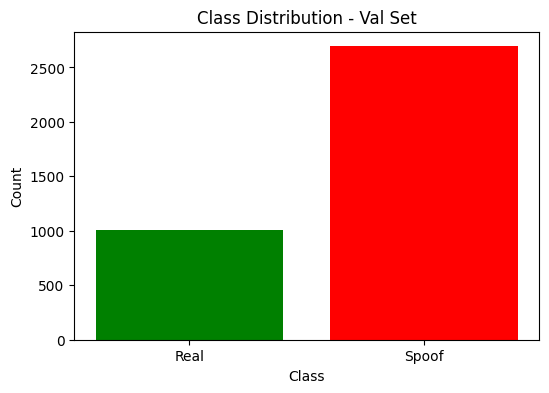

Test Set - Total: 8330
  Real: 914 (11.0%)
  Spoof: 7416 (89.0%)
  Ratio Spoof:Real = 8.11:1


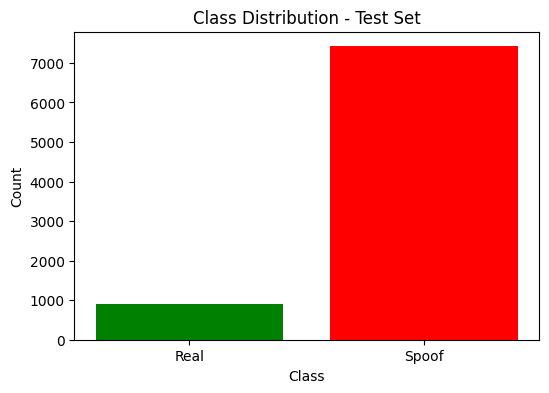

In [9]:
import matplotlib.pyplot as plt

def plot_distribution(split_name):
    dataset = AntiSpoofDataset(lcc_fasd_root=lcc_fasd_root, siw_root=siw_root, split=split_name, transform=None)
    
    real_count = 0
    spoof_count = 0
    
    for _, label in dataset.samples:
        if label == 0:
            real_count += 1
        else:
            spoof_count += 1
            
    total = real_count + spoof_count
    ratio = spoof_count/real_count if real_count > 0 else 0
    print(f"{split_name.capitalize()} Set - Total: {total}")
    print(f"  Real: {real_count} ({real_count/total*100:.1f}%)")
    print(f"  Spoof: {spoof_count} ({spoof_count/total*100:.1f}%)")
    print(f"  Ratio Spoof:Real = {ratio:.2f}:1")
    
    # Plot
    labels = ['Real', 'Spoof']
    counts = [real_count, spoof_count]
    
    plt.figure(figsize=(6, 4))
    plt.bar(labels, counts, color=['green', 'red'])
    plt.title(f'Class Distribution - {split_name.capitalize()} Set')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.show()

# Analyze distributions for all splits
for split in ['train', 'val', 'test']:
    plot_distribution(split)